In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance
from IPython.display import HTML

In [ ]:
!wget https://www.nstac.go.jp/sys/files//SSDSE-C-2022.csv

--2023-01-23 14:16:05--  https://www.nstac.go.jp/sys/files//SSDSE-C-2022.csv
Resolving www.nstac.go.jp (www.nstac.go.jp)... 176.34.53.110, 54.64.243.149
Connecting to www.nstac.go.jp (www.nstac.go.jp)|176.34.53.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59584 (58K) [text/csv]
Saving to: ‘SSDSE-C-2022.csv’

SSDSE-C-2022.csv    100%[===================>]  58.19K  --.-KB/s    in 0.1s    

2023-01-23 14:16:06 (390 KB/s) - ‘SSDSE-C-2022.csv’ saved [59584/59584]



In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=40bacb572382c9a0b7b05c68547dd7ea0f71e403235ee221bd53b126b25bdb0b
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


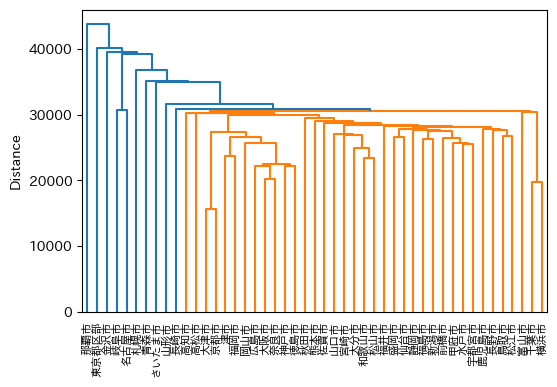

In [50]:
import csv

import japanize_matplotlib


prefs = []
pref_consum = []
with open('/content/SSDSE-C-2022.csv', encoding='shift-jis') as f:
  data = csv.reader(f)
  next(data)
  next(data)
  next(data)
  for row in data:
    prefs.append(row[2])
    pref_consum.append(row[5:])
pref_consum = np.array(pref_consum, dtype=np.int64)

D = scipy.spatial.distance.pdist(pref_consum, 'euclidean')

## Nearest Neighbour Clustering
Z_NNC = scipy.cluster.hierarchy.linkage(D, 'single')
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z_NNC, labels=list(prefs), ax=ax)
ax.set_ylabel("Distance")
plt.show()

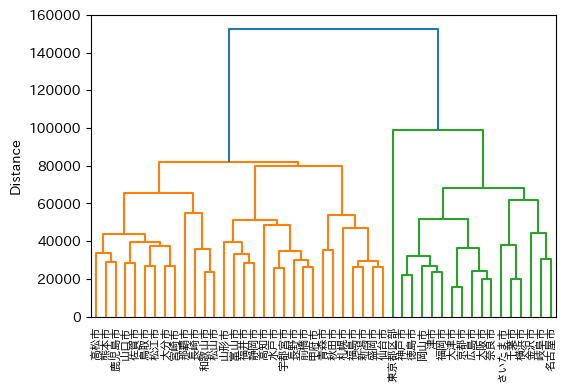

In [51]:
## Furthest Neighbour Clustering
Z_FNC = scipy.cluster.hierarchy.linkage(D, 'complete')
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z_FNC, labels=list(prefs), ax=ax)
ax.set_ylabel("Distance")
plt.show()

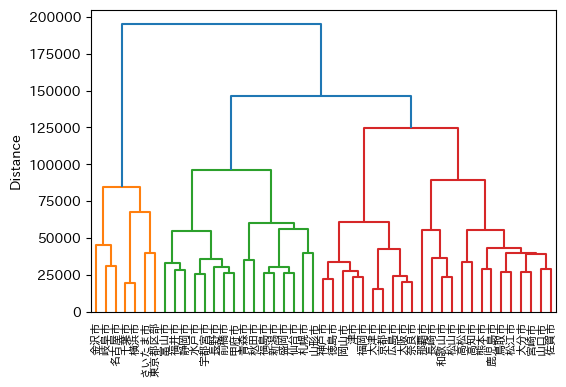

In [52]:
# Ward's Method
Z_W = scipy.cluster.hierarchy.linkage(D, 'ward')
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z_W, labels=list(prefs), ax=ax)
ax.set_ylabel("Distance")
plt.show()